# Creating matrices for pairs of labels

## Which ones?

- Sequence-based ML model F1 scores
- Sequence similarity scores
- annotation similarity scores
- annotation overlap

## For which dataset?

- First for yeast because of conference

In [1]:
from subpred.util import load_df
import networkx as nx
import re
import pandas as pd
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed



In [2]:
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids={559292},
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=1,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)
# TODO what about part_of relations?


,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
P00401,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,True,1,559292,Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...
P00830,MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...,True,1,559292,"ATP synthase subunit beta, mitochondrial (EC 7..."
P04817,MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...,True,1,559292,Arginine permease CAN1 (Canavanine resistance ...
P07213,MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...,True,1,559292,Mitochondrial import receptor subunit TOM70 (7...
P14906,MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...,True,1,559292,Protein translocation protein SEC63 (Protein N...
...,...,...,...,...,...
P39542,MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...,True,1,559292,Uncharacterized transporter YJL193W
Q05497,MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...,True,1,559292,Uncharacterized transporter YDR338C
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0005346,purine ribonucleotide transmembrane transporte...
1,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0005347,ATP transmembrane transporter activity
2,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:1901702,salt transmembrane transporter activity
3,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015215,nucleotide transmembrane transporter activity
4,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015216,purine nucleotide transmembrane transporter ac...
...,...,...,...,...,...,...,...,...
7732,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022853,active monoatomic ion transmembrane transporte...
7733,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015399,primary active transmembrane transporter activity
7734,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015453,oxidoreduction-driven active transmembrane tra...
7735,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022890,inorganic cation transmembrane transporter act...


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input
1,GO:0000095,S-adenosyl-L-methionine transmembrane transpor...,CHEBI:59789,S-adenosyl-L-methionine zwitterion,has_primary_input
2,GO:0000099,sulfur amino acid transmembrane transporter ac...,CHEBI:26834,sulfur-containing amino acid,has_primary_input
3,GO:0000100,S-methylmethionine transmembrane transporter a...,CHEBI:58252,S-methyl-L-methionine zwitterion,has_primary_input
4,GO:0000102,L-methionine secondary active transmembrane tr...,CHEBI:57844,L-methionine zwitterion,has_primary_input
...,...,...,...,...,...
379,GO:1901682,sulfur compound transmembrane transporter acti...,CHEBI:26835,sulfur molecular entity,has_primary_input
380,GO:1902557,5'-adenylyl sulfate transmembrane transporter ...,CHEBI:58243,5'-adenylyl sulfate(2-),has_primary_input
381,GO:1903089,5-amino-1-ribofuranosylimidazole-4-carboxamide...,CHEBI:28498,acadesine,has_primary_input
382,GO:1903425,fluoride transmembrane transporter activity,CHEBI:17051,fluoride,has_primary_input


## Adjacency matrix

In [3]:
def get_adjacency_matrix(graph, labels: list, edges_filter: set = {"is_a"}):
    subgraph = graph.edge_subgraph(
        [edge for edge in graph.edges(keys=True) if edge[2] in edges_filter]
    )
    assert len(labels) == len(set(labels)), "labels should only contain unique elements"
    subgraph = subgraph.subgraph(labels)

    # scipy sparse matrix
    df_adjacency_matrix = nx.adjacency_matrix(G=subgraph, nodelist=labels)

    df_adjacency_matrix = pd.DataFrame(
        df_adjacency_matrix.todense(), columns=labels, index=labels
    )
    return df_adjacency_matrix


### GO adjacency

In [4]:
graph_go = load_df("go_obo")
go_ids = sorted(df_uniprot_goa.go_id_ancestor.unique())
df_adj_matrix_go = get_adjacency_matrix(graph_go, labels=go_ids, edges_filter={"is_a"})
df_adj_matrix_go


,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
GO:0000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:0000099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
GO:1903425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### ChEBI adjacency

In [5]:
graph_chebi = load_df("chebi_obo")
chebi_id_primary = sorted(
    df_go_chebi[df_go_chebi.chebi_go_relation == "has_primary_input"].chebi_id.unique()
)
df_adj_matrix_chebi = get_adjacency_matrix(
    graph_chebi.copy(), labels=chebi_id_primary, edges_filter={"is_a"}
)
df_adj_matrix_chebi


,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:64709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:68452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Chemical similarity

Here, we are using the morgan fingerprints. There are other options that might be better:


In [6]:
from subpred.chemical_similarity import get_pairwise_similarity

methods = [
    "morgan",
    "atompairs",
    "torsions",
    "maccs",
]

chebi_ids_primary = df_go_chebi[
    df_go_chebi.chebi_go_relation == "has_primary_input"
].chebi_id.unique()

for method in methods:
    print(method)
    df_tanimoto = get_pairwise_similarity(chebi_ids_primary, fingerprint_method=method)
    display(df_tanimoto)


morgan


[15:20:29] WARNING: not removing hydrogen atom without neighbors


chebi_id,CHEBI:46911,CHEBI:59789,CHEBI:58252,CHEBI:57844,CHEBI:45725,CHEBI:17359,CHEBI:77847,CHEBI:57966,CHEBI:29108,CHEBI:17996,...,CHEBI:33118,CHEBI:58702,CHEBI:58937,CHEBI:18212,CHEBI:49552,CHEBI:16347,CHEBI:15792,CHEBI:58243,CHEBI:28498,CHEBI:17051
chebi_id,,,,,,,,,,,,,,,,,,,,,
CHEBI:46911,1.000000,0.218750,0.500000,0.500000,0.222222,0.083333,0.125000,0.360000,0.0,0.0,...,0.043478,0.147059,0.058824,0.083333,0.0,0.212121,0.250000,0.057143,0.074074,0.0
CHEBI:59789,0.218750,1.000000,0.311475,0.230769,0.028986,0.032258,0.064103,0.107692,0.0,0.0,...,0.016393,0.069444,0.134021,0.049180,0.0,0.130435,0.096774,0.493333,0.352113,0.0
CHEBI:58252,0.500000,0.311475,1.000000,0.517241,0.060606,0.076923,0.119048,0.241379,0.0,0.0,...,0.040000,0.138889,0.088235,0.076923,0.0,0.235294,0.230769,0.055556,0.071429,0.0
CHEBI:57844,0.500000,0.230769,0.517241,1.000000,0.060606,0.076923,0.119048,0.241379,0.0,0.0,...,0.040000,0.138889,0.072464,0.076923,0.0,0.235294,0.230769,0.055556,0.071429,0.0
CHEBI:45725,0.222222,0.028986,0.060606,0.060606,1.000000,0.000000,0.027027,0.173913,0.0,0.0,...,0.000000,0.000000,0.015625,0.000000,0.0,0.031250,0.045455,0.015152,0.020000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:16347,0.212121,0.130435,0.235294,0.235294,0.031250,0.083333,0.184211,0.259259,0.0,0.0,...,0.043478,0.147059,0.058824,0.083333,0.0,1.000000,0.304348,0.072464,0.074074,0.0
CHEBI:15792,0.250000,0.096774,0.230769,0.230769,0.045455,0.142857,0.129032,0.411765,0.0,0.0,...,0.076923,0.208333,0.050847,0.142857,0.0,0.304348,1.000000,0.066667,0.090909,0.0
CHEBI:58243,0.057143,0.493333,0.055556,0.055556,0.015152,0.034483,0.144928,0.062500,0.0,0.0,...,0.017544,0.106061,0.177778,0.034483,0.0,0.072464,0.066667,1.000000,0.352941,0.0


atompairs


[15:20:32] WARNING: not removing hydrogen atom without neighbors


chebi_id,CHEBI:46911,CHEBI:59789,CHEBI:58252,CHEBI:57844,CHEBI:45725,CHEBI:17359,CHEBI:77847,CHEBI:57966,CHEBI:29108,CHEBI:17996,...,CHEBI:33118,CHEBI:58702,CHEBI:58937,CHEBI:18212,CHEBI:49552,CHEBI:16347,CHEBI:15792,CHEBI:58243,CHEBI:28498,CHEBI:17051
chebi_id,,,,,,,,,,,,,,,,,,,,,
CHEBI:46911,1.000000,0.090323,0.372881,0.411765,0.104167,0.024390,0.139241,0.243902,0.0,0.0,...,0.000000,0.082192,0.057692,0.024390,0.0,0.140845,0.096154,0.052469,0.100000,0.0
CHEBI:59789,0.090323,1.000000,0.137705,0.090323,0.056818,0.006536,0.075529,0.032573,0.0,0.0,...,0.006579,0.061538,0.260042,0.006536,0.0,0.080997,0.015723,0.424883,0.343465,0.0
CHEBI:58252,0.372881,0.137705,1.000000,0.528302,0.045455,0.020000,0.087912,0.153846,0.0,0.0,...,0.000000,0.086420,0.079618,0.020000,0.0,0.232877,0.064516,0.060606,0.063218,0.0
CHEBI:57844,0.411765,0.090323,0.528302,1.000000,0.060000,0.024390,0.097561,0.186047,0.0,0.0,...,0.000000,0.082192,0.057692,0.024390,0.0,0.173913,0.075472,0.042813,0.053892,0.0
CHEBI:45725,0.104167,0.056818,0.045455,0.060000,1.000000,0.000000,0.059829,0.062500,0.0,0.0,...,0.000000,0.008929,0.055072,0.027027,0.0,0.036036,0.022472,0.027397,0.039604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:16347,0.140845,0.080997,0.232877,0.173913,0.036036,0.020000,0.087912,0.132075,0.0,0.0,...,0.000000,0.060241,0.052795,0.020000,0.0,1.000000,0.178571,0.054217,0.057143,0.0
CHEBI:15792,0.096154,0.015723,0.064516,0.075472,0.022472,0.080000,0.041667,0.241379,0.0,0.0,...,0.000000,0.122807,0.032787,0.080000,0.0,0.178571,1.000000,0.021944,0.025478,0.0
CHEBI:58243,0.052469,0.424883,0.060606,0.042813,0.027397,0.016340,0.128931,0.025641,0.0,0.0,...,0.000000,0.054545,0.364465,0.006472,0.0,0.054217,0.021944,1.000000,0.348485,0.0


torsions


[15:20:36] WARNING: not removing hydrogen atom without neighbors


chebi_id,CHEBI:46911,CHEBI:59789,CHEBI:58252,CHEBI:57844,CHEBI:45725,CHEBI:17359,CHEBI:77847,CHEBI:57966,CHEBI:29108,CHEBI:17996,...,CHEBI:33118,CHEBI:58702,CHEBI:58937,CHEBI:18212,CHEBI:49552,CHEBI:16347,CHEBI:15792,CHEBI:58243,CHEBI:28498,CHEBI:17051
chebi_id,,,,,,,,,,,,,,,,,,,,,
CHEBI:46911,1.000000,0.127273,0.545455,0.600000,0.0625,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.016949,0.022222,0.0
CHEBI:59789,0.127273,1.000000,0.145455,0.107143,0.0000,0.0,0.015625,0.000000,0.0,0.0,...,0.0,0.0,0.021277,0.0,0.0,0.033333,0.0,0.630769,0.508197,0.0
CHEBI:58252,0.545455,0.145455,1.000000,0.545455,0.0000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
CHEBI:57844,0.600000,0.107143,0.545455,1.000000,0.0000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.020408,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
CHEBI:45725,0.062500,0.000000,0.000000,0.000000,1.0000,0.0,0.000000,0.090909,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:16347,0.000000,0.033333,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.016949,0.022222,0.0
CHEBI:15792,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.022222,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0
CHEBI:58243,0.016949,0.630769,0.000000,0.000000,0.0000,0.0,0.067797,0.000000,0.0,0.0,...,0.0,0.0,0.056180,0.0,0.0,0.016949,0.0,1.000000,0.551724,0.0


maccs


[15:20:40] WARNING: not removing hydrogen atom without neighbors


chebi_id,CHEBI:46911,CHEBI:59789,CHEBI:58252,CHEBI:57844,CHEBI:45725,CHEBI:17359,CHEBI:77847,CHEBI:57966,CHEBI:29108,CHEBI:17996,...,CHEBI:33118,CHEBI:58702,CHEBI:58937,CHEBI:18212,CHEBI:49552,CHEBI:16347,CHEBI:15792,CHEBI:58243,CHEBI:28498,CHEBI:17051
chebi_id,,,,,,,,,,,,,,,,,,,,,
CHEBI:46911,1.000000,0.287671,0.545455,0.620690,0.533333,0.076923,0.232558,0.680000,0.040000,0.040000,...,0.085714,0.150000,0.214286,0.093750,0.040000,0.317073,0.250000,0.180723,0.258065,0.040000
CHEBI:59789,0.287671,1.000000,0.356164,0.338028,0.253333,0.084337,0.231707,0.232877,0.013699,0.013699,...,0.075000,0.132530,0.494382,0.064103,0.013699,0.307692,0.152778,0.659091,0.680000,0.013699
CHEBI:58252,0.545455,0.356164,1.000000,0.857143,0.307692,0.146341,0.183673,0.468750,0.033333,0.033333,...,0.075000,0.159091,0.250000,0.111111,0.033333,0.475000,0.212121,0.170455,0.185714,0.033333
CHEBI:57844,0.620690,0.338028,0.857143,1.000000,0.342857,0.102564,0.173913,0.535714,0.038462,0.038462,...,0.054054,0.146341,0.228571,0.090909,0.038462,0.410256,0.241379,0.151163,0.179104,0.038462
CHEBI:45725,0.533333,0.253333,0.307692,0.342857,1.000000,0.024390,0.177778,0.400000,0.040000,0.040000,...,0.027027,0.022222,0.214286,0.029412,0.040000,0.173913,0.060606,0.139535,0.200000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:16347,0.317073,0.307692,0.475000,0.410256,0.173913,0.111111,0.297872,0.351351,0.030303,0.030303,...,0.121951,0.227273,0.256757,0.131579,0.030303,1.000000,0.303030,0.204545,0.246377,0.030303
CHEBI:15792,0.250000,0.152778,0.212121,0.241379,0.060606,0.148148,0.272727,0.347826,0.071429,0.071429,...,0.125000,0.346154,0.156250,0.200000,0.071429,0.303030,1.000000,0.129870,0.155172,0.071429
CHEBI:58243,0.180723,0.659091,0.170455,0.151163,0.139535,0.253333,0.329114,0.132530,0.012987,0.012987,...,0.139241,0.225000,0.556818,0.129870,0.012987,0.204545,0.129870,1.000000,0.645570,0.012987


## Overlap Matrix

### GO

In [7]:
exclude_iea = True
df_uniprot_goa_overlap = df_uniprot_goa.copy(deep=True)
if exclude_iea:
    df_uniprot_goa_overlap = df_uniprot_goa[df_uniprot_goa.evidence_code != "IEA"]
go_ids_unique = sorted(df_uniprot_goa_overlap.go_id_ancestor.unique())
go_to_proteins = (
    df_uniprot_goa_overlap[["Uniprot", "go_id_ancestor"]]
    .groupby("go_id_ancestor")
    .apply(lambda x: set(x.Uniprot))
    .to_dict()
)
records = list()
for go_id1 in go_ids_unique:
    set1 = go_to_proteins[go_id1]
    for go_id2 in go_ids_unique:
        set2 = go_to_proteins[go_id2]
        overlap = len(set1 & set2)
        records.append([go_id1, go_id2, overlap])

df_go_overlaps = pd.DataFrame(records, columns=["go_id1", "go_id2", "overlap"])
df_go_overlaps = df_go_overlaps.pivot(
    index="go_id1", columns="go_id2", values="overlap"
)
df_go_overlaps


go_id2,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
go_id1,,,,,,,,,,,,,,,,,,,,,
GO:0000006,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000064,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
GO:0000099,0,0,0,0,3,0,1,0,0,0,...,0,0,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,1,1,0,0,0,0,0,6,0,1,...,3,5,3,0,9,72,0,0,2,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,1,0,0,2,0,0


<Axes: xlabel='go_id2', ylabel='go_id1'>

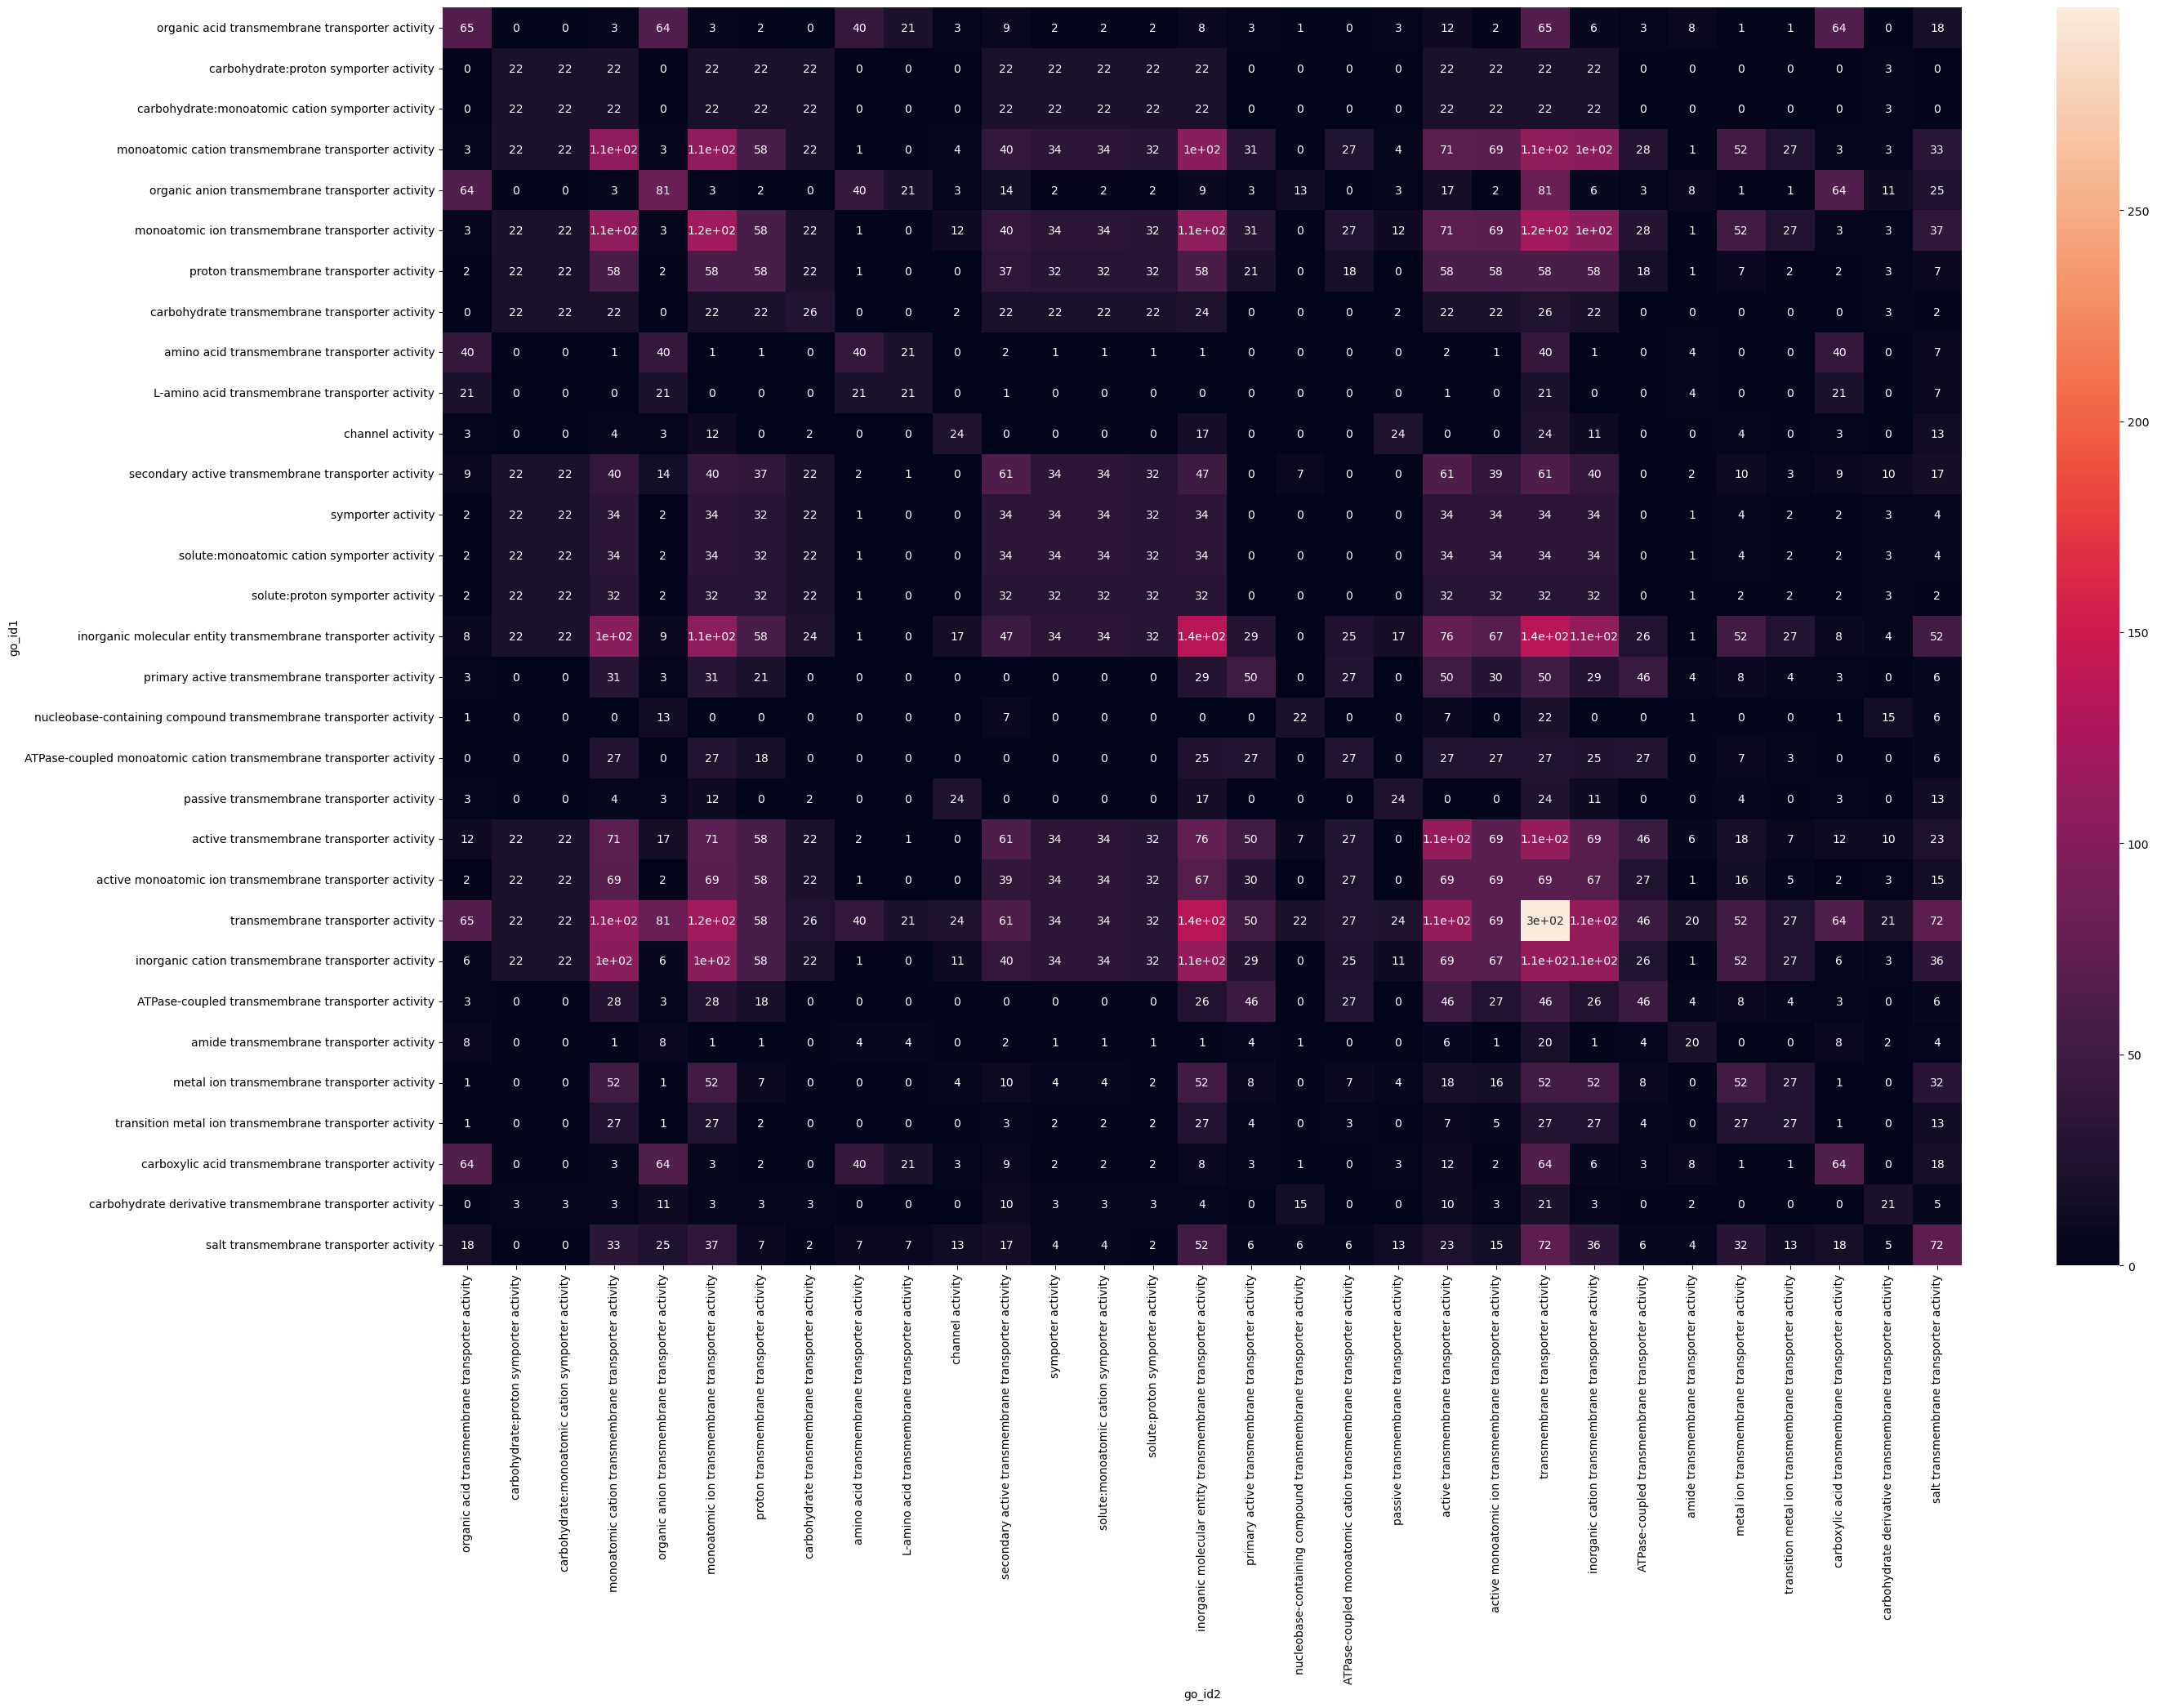

In [8]:
fig, ax = plt.subplots(figsize=(30, 20))
go_id_to_term = {
    go_id: go_term
    for go_id, go_term in df_uniprot_goa[["go_id_ancestor", "go_term_ancestor"]]
    .drop_duplicates()
    .to_records(index=False)
}
df_go_overlaps_ge20 = df_go_overlaps.loc[np.diag(df_go_overlaps) >= 20, np.diag(df_go_overlaps) >= 20]

df_go_overlaps_ge20 = df_go_overlaps_ge20.rename(columns=go_id_to_term, index=go_id_to_term)
sns.heatmap(df_go_overlaps_ge20, ax=ax, annot=True)

### ChEBI

In [9]:
exlcude_iea = True
primary_input_only = True
df_go_chebi_overlaps = df_go_chebi.copy(deep=True)
df_uniprot_goa_chebi_overlap = df_uniprot_goa.copy(deep=True)
# df_go_chebi_overlaps["proteins"] = df_go_chebi_overlaps.go_id.map(go_to_proteins)

if primary_input_only:
    df_go_chebi_overlaps = df_go_chebi_overlaps[
        df_go_chebi_overlaps.chebi_go_relation == "has_primary_input"
    ]

df_uniprot_go_chebi = (
    pd.merge(
        df_uniprot_goa_chebi_overlap[["Uniprot", "go_id_ancestor"]].rename(
            columns={"go_id_ancestor": "go_id"}
        ),
        df_go_chebi_overlaps[["go_id", "chebi_id"]],
        on="go_id",
        how="inner",
    )
    .drop_duplicates()
    .reset_index(drop=True)
)
dict_chebi_to_uniprot = (
    df_uniprot_go_chebi[["Uniprot", "chebi_id"]]
    .drop_duplicates()
    .groupby("chebi_id")
    .apply(lambda x: set(x.Uniprot))
    .to_dict()
)
chebi_terms = sorted(dict_chebi_to_uniprot.keys())
df_chebi_overlaps = pd.DataFrame(
    data=[
        [
            len(dict_chebi_to_uniprot[chebi1] & dict_chebi_to_uniprot[chebi2])
            for chebi1 in chebi_terms
        ]
        for chebi2 in chebi_terms
    ],
    columns=chebi_terms,
    index=chebi_terms,
)
df_chebi_overlaps


,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,2,0,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
CHEBI:15354,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEBI:15361,1,0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,4,0,0,0
CHEBI:15377,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,2,0,0,...,2,0,10,2,0,25,3,2,1,0
CHEBI:64709,1,0,4,0,1,0,1,0,2,0,...,0,0,3,6,2,3,65,3,0,5
CHEBI:68452,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,2,3,8,0,2
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


<Axes: xlabel='go_id2', ylabel='go_id1'>

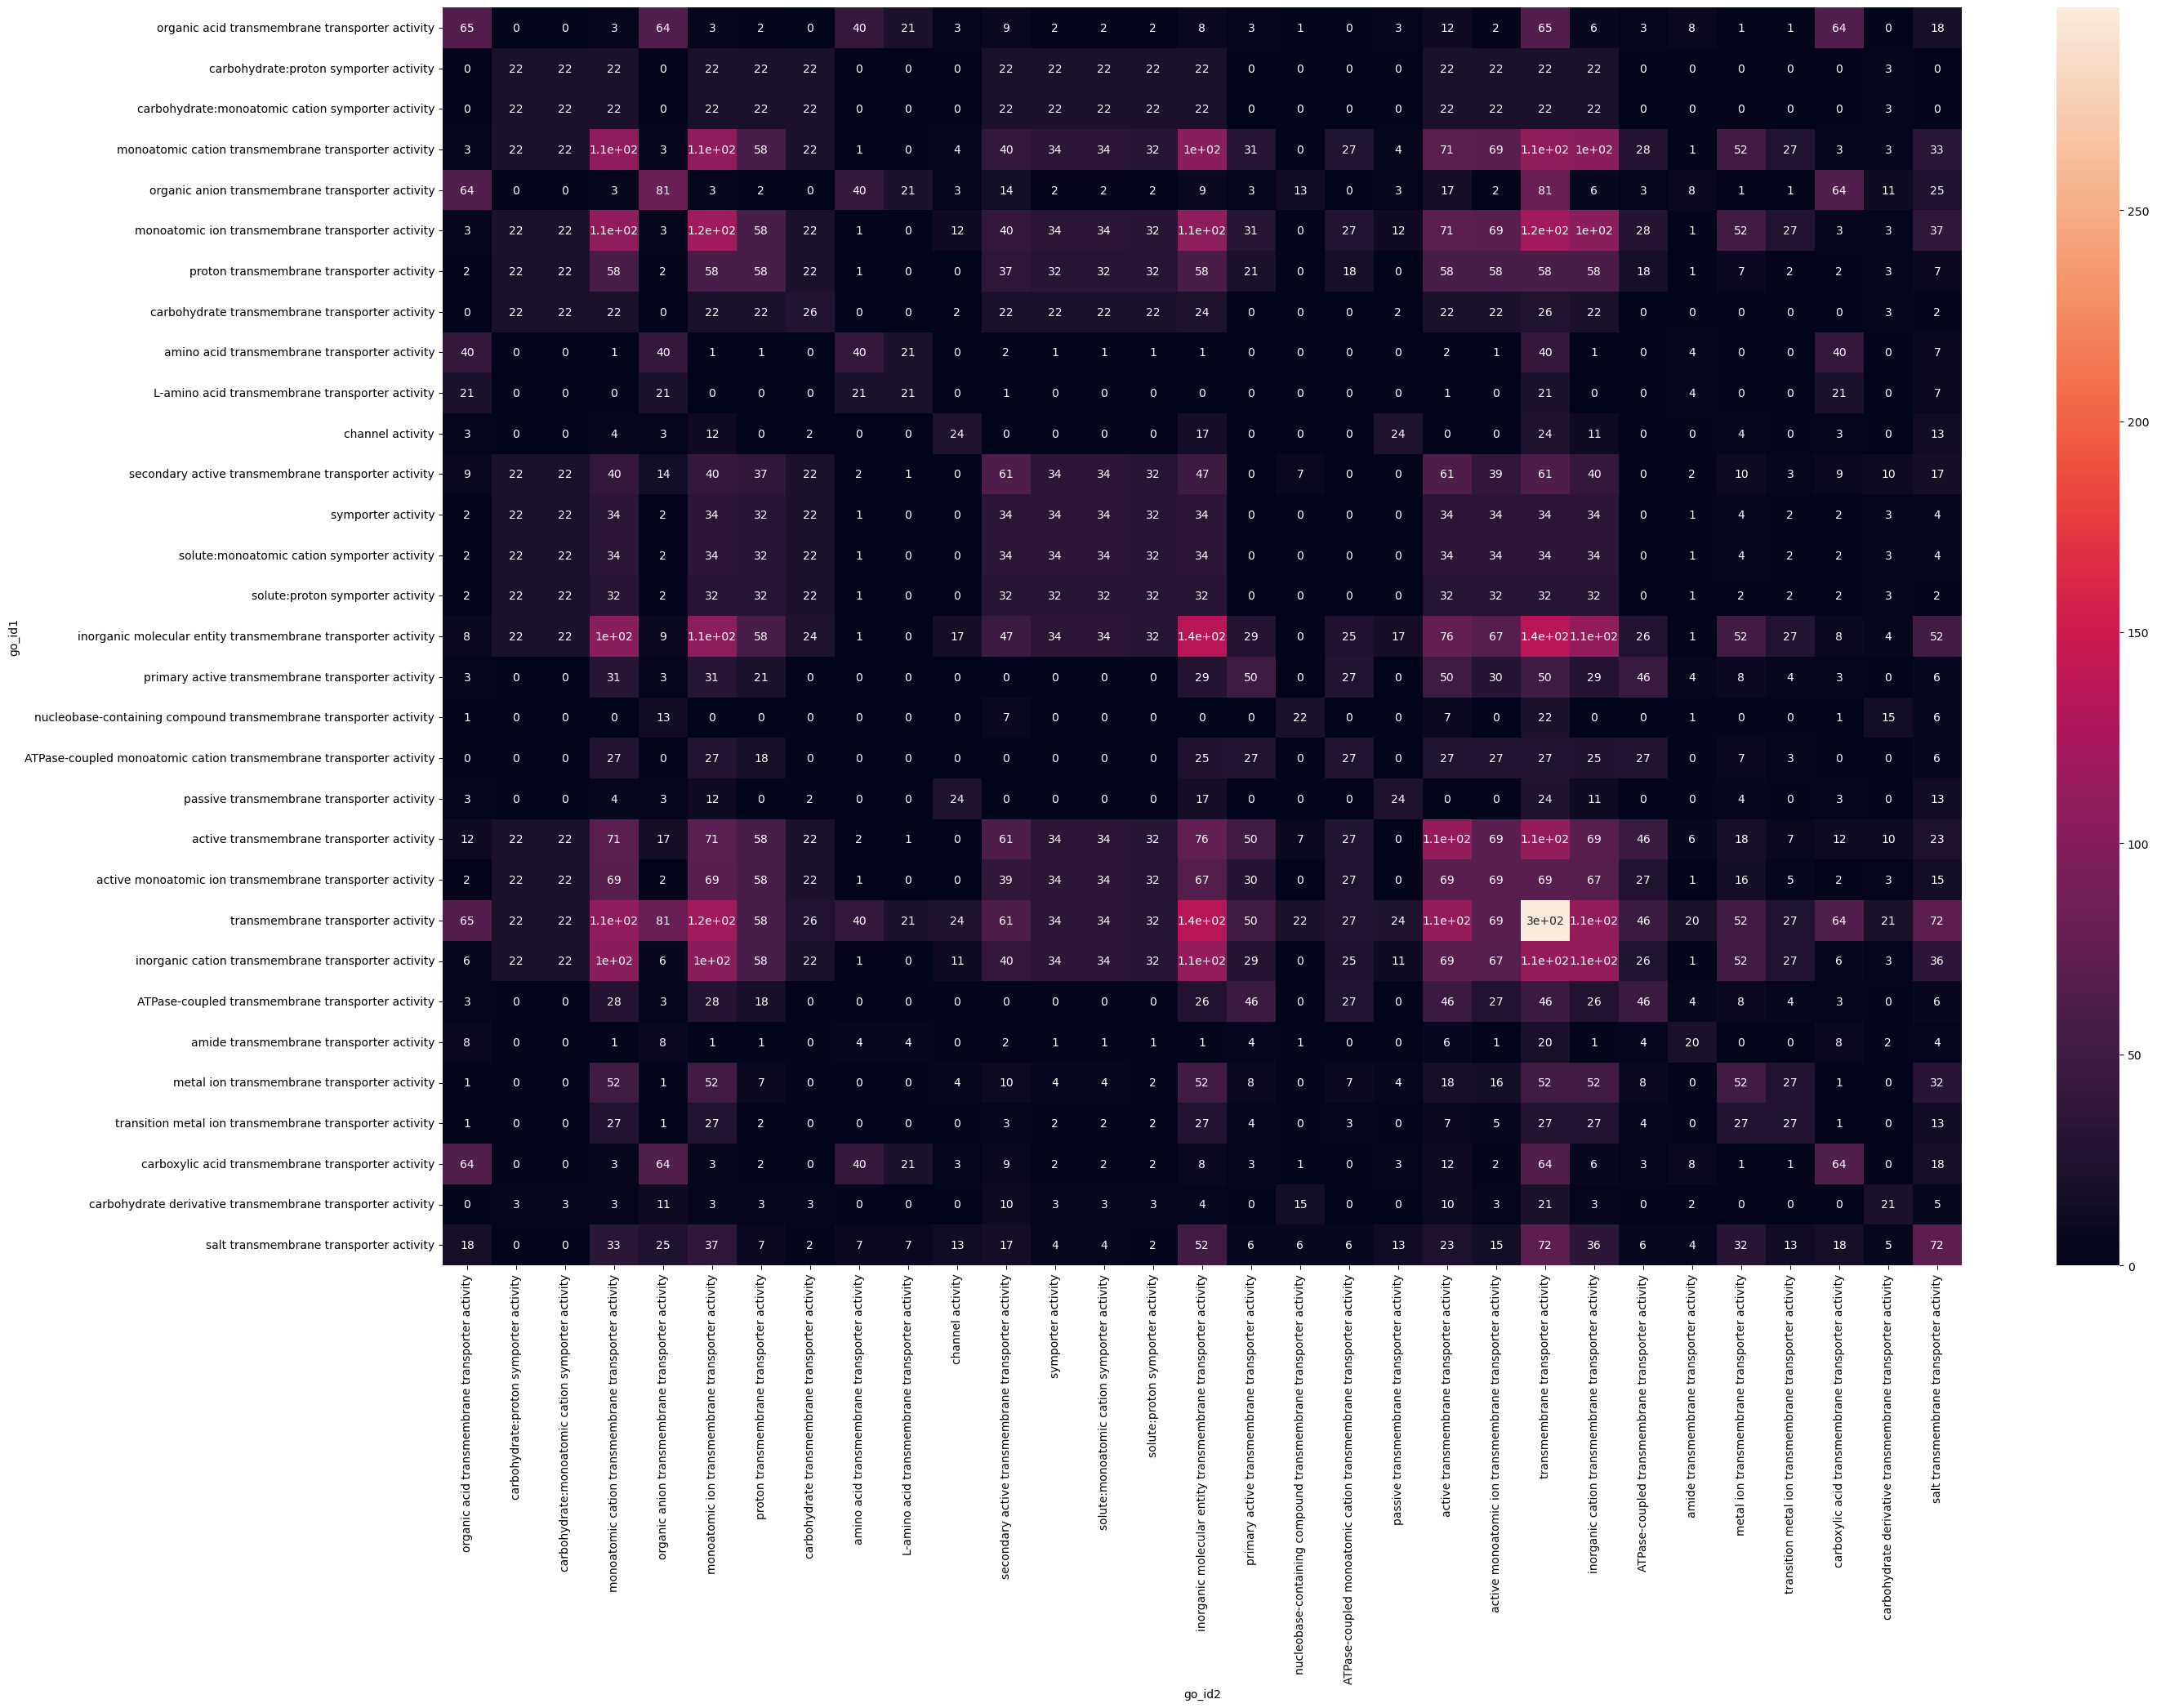

In [10]:
fig, ax = plt.subplots(figsize=(30, 20))
go_id_to_term = {
    go_id: go_term
    for go_id, go_term in df_uniprot_goa[["go_id_ancestor", "go_term_ancestor"]]
    .drop_duplicates()
    .to_records(index=False)
}
df_go_overlaps_ge20 = df_go_overlaps.loc[np.diag(df_go_overlaps) >= 20, np.diag(df_go_overlaps) >= 20]

df_go_overlaps_ge20 = df_go_overlaps_ge20.rename(columns=go_id_to_term, index=go_id_to_term)
sns.heatmap(df_go_overlaps_ge20, ax=ax, annot=True)

<Axes: >

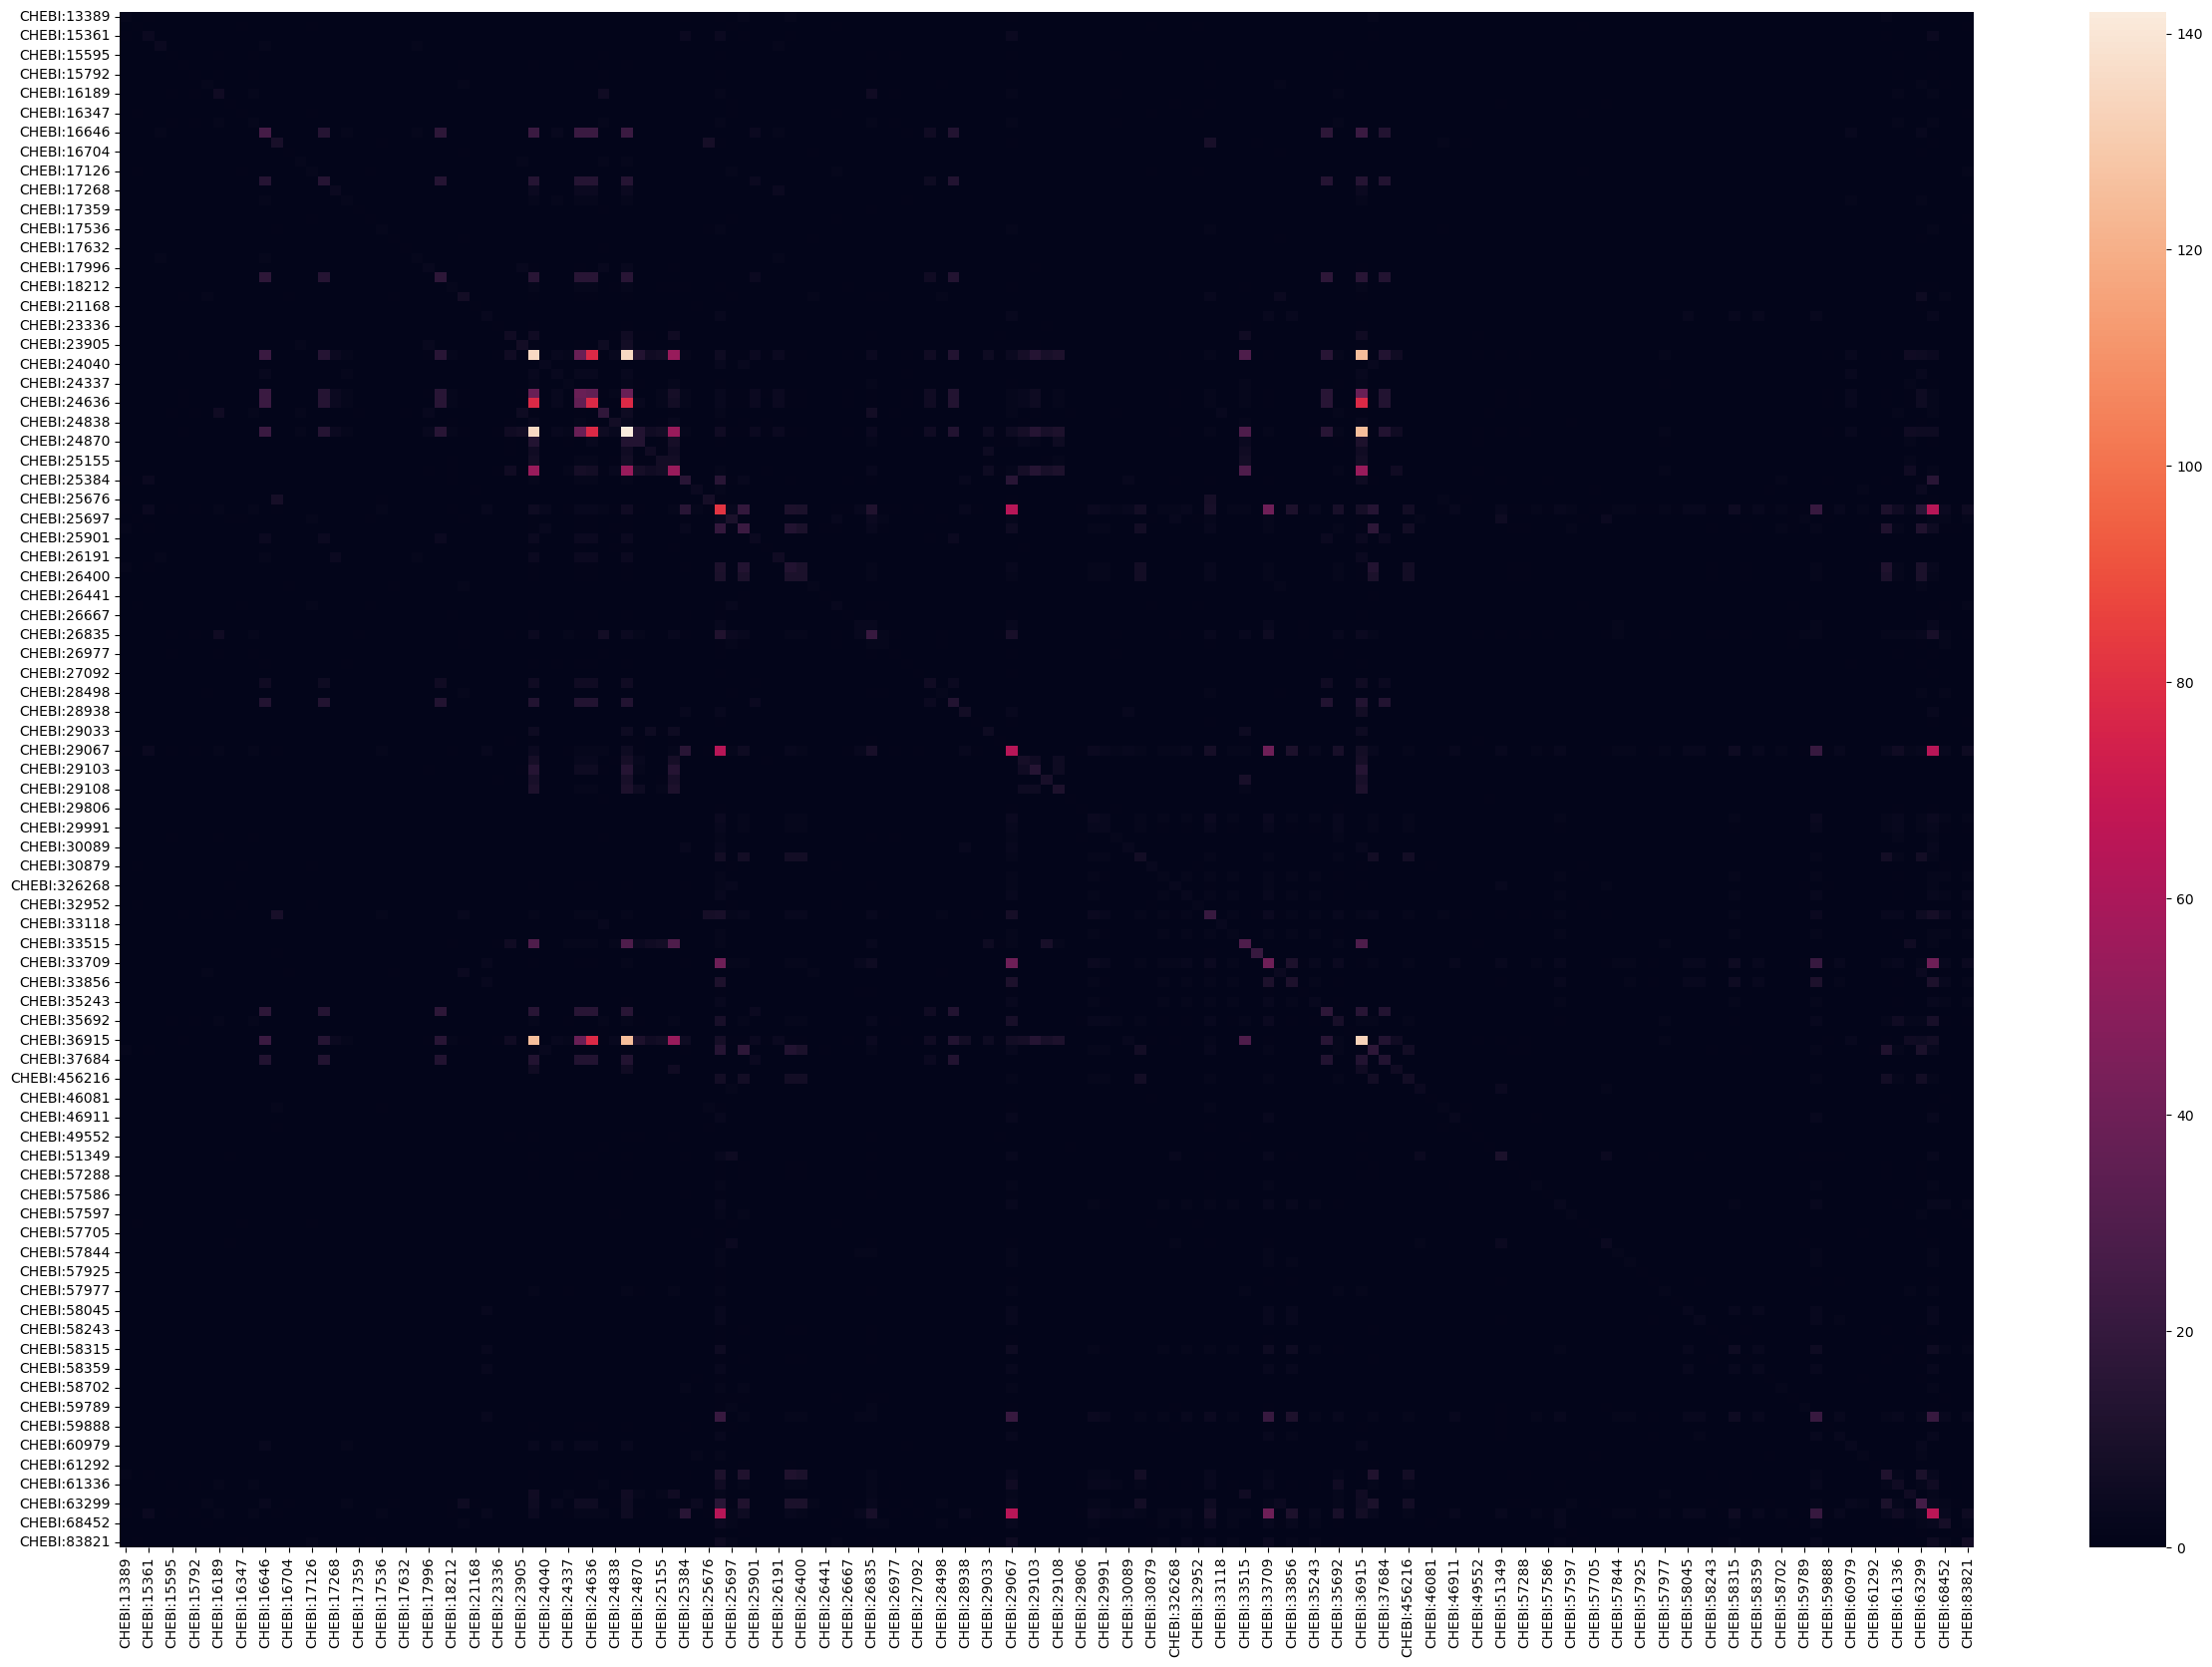

In [11]:
fig, ax = plt.subplots(figsize=(30, 20))
df_chebi_overlaps_ge20 = df_chebi_overlaps.loc[np.diag(df_chebi_overlaps) >=20,np.diag(df_chebi_overlaps) >=20]
sns.heatmap(df_chebi_overlaps, ax=ax)

## GO Semantic Similarity

- GOGO
    - Perl/C
    - Not updated
    - https://github.com/zwang-bioinformatics/GOGO
    - https://www.nature.com/articles/s41598-018-33219-y
- G-SESAME
    - Webserver, closed source
    - Not updated
    - https://doi.org/10.1093/bioinformatics/btm087
- GOntoSim
    - Python 2.7
    - Not updated
    - https://www.nature.com/articles/s41598-022-07624-3
    - https://github.com/cbrl-nuces/GOntoSim
- GOssTo
    - Java
    - Not updated
    - https://github.com/pwac092/gossto
- GOSemSim
    - R
    - Includes other methods
    - https://bioconductor.org/packages/release/bioc/html/GOSemSim.html
- goatools?
- Review: https://link.springer.com/protocol/10.1007/978-1-4939-3743-1_12
- Related/Not related binary matrix including all descendants
- Shortest paths
- binary fingerprint of children
- topological sorting?

In [12]:
# TODO include R script somehow
# TODO geneSim, mclusterSim from same package https://bioconductor.org/packages/release/bioc/manuals/GOSemSim/man/GOSemSim.pdf
# Problem: needs organism database
#  conda install -c bioconda bioconductor-gosemsim
#  conda install -c bioconda bioconductor-org.hs.eg.db
# conda install -c conda-forge r-languageserver
# R
# TODO build own Org object like that
# library(GOSemSim)
# library('org.Hs.eg.db')
# d <- godata('org.Hs.eg.db', ont="MF", computeIC=FALSE)
# goSim("GO:0000006", "GO:0000007", semData=d, measure="Wang")  # mgoSim for list of go terms


## Pairwise ML models

- find label combinations with enough samples

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate,
    GridSearchCV,
    LeaveOneOut,
)
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
import numpy as np
from random import choice, seed
from subpred.features import calculate_features


In [14]:
def get_label_to_proteins(
    df_uniprot_goa, min_samples_per_class: int, exclude_iea: bool
):
    df_uniprot_goa_view = df_uniprot_goa.copy()
    if exclude_iea:  # TODO maybe just do this at the beginning?
        df_uniprot_goa_view = df_uniprot_goa_view[
            df_uniprot_goa_view.evidence_code != "IEA"
        ]

    df_uniprot_labels = (
        df_uniprot_goa_view[["Uniprot", "go_id_ancestor"]]
        .drop_duplicates()
        .reset_index(drop=True)
        .rename(columns={"go_id_ancestor": "go_id"})
    )
    label_protein_counts = df_uniprot_labels.groupby("go_id").apply(len)
    labels_enough_proteins = set(
        label_protein_counts[
            label_protein_counts >= min_samples_per_class
        ].index.unique()
    )

    df_uniprot_labels = df_uniprot_labels[
        df_uniprot_labels.go_id.isin(labels_enough_proteins)
    ]
    dict_label_to_proteins = (
        df_uniprot_labels.drop_duplicates()
        .reset_index(drop=True)
        .groupby("go_id")
        .apply(lambda x: set(x.Uniprot))
        .to_dict()
    )
    return dict_label_to_proteins


In [15]:
def transform_labels(
    df_features: pd.DataFrame, df_two_labels: pd.DataFrame, multilabel: bool = True
):
    """Transforms string labels into numbers deterministically

    Args:
        df_features (pd.DataFrame): _description_
        df_two_labels (pd.DataFrame): _description_
        multilabel (bool, optional):
            If true, returns 1-hot encoding of sorted labels (allows overlaps).
            if false, returns index of each label in sorted array
            Defaults to True.
    Returns:
        Numpy arrays for sklearn
    """
    if multilabel:
        series_labels = df_two_labels.groupby("Uniprot").apply(lambda x: list(x.label))
    else:
        # series does not contain duplicated proteins, otherwise verify_integrity throws exception
        series_labels = df_two_labels.set_index("Uniprot", verify_integrity=True)
    sample_names = series_labels.index.values
    X = df_features.loc[sample_names].values
    # automatically uses sorted set of labels as reference
    label_encoder = MultiLabelBinarizer() if multilabel else LabelEncoder()
    y = label_encoder.fit_transform(series_labels.values.ravel())
    class_names = label_encoder.classes_
    assert len(class_names) == 2, class_names
    return X, y, class_names, sample_names


In [16]:
def get_classification_tasks(
    df_features: pd.DataFrame,
    dict_label_to_proteins: dict,
    multi_output: bool,
    # min_samples_per_class: int=20,
    min_unique_samples_per_class: int = 15,
):
    classes = sorted(list(dict_label_to_proteins.keys()))

    for i, go_id1 in enumerate(classes):
        set_proteins1 = dict_label_to_proteins[go_id1]
        df_labels1 = pd.DataFrame({"Uniprot": list(set_proteins1), "label": go_id1})
        for j in range(i, len(classes)):
            go_id2 = classes[j]
            if go_id1 == go_id2:
                continue
            set_proteins2 = dict_label_to_proteins[go_id2]
            df_labels2 = pd.DataFrame({"Uniprot": list(set_proteins2), "label": go_id2})
            df_labels = (
                pd.concat([df_labels1, df_labels2])
                .drop_duplicates()
                .sort_values(["Uniprot", "label"])
                .reset_index(drop=True)
            )
            # TODO if enough samples are available, it could also be viable to turn antiport/symport into a separate class
            intersection_set = set_proteins1 & set_proteins2
            unique_proteins1 = set_proteins1 - intersection_set
            unique_proteins2 = set_proteins2 - intersection_set
            if (
                len(unique_proteins1) < min_unique_samples_per_class
                or len(unique_proteins2) < min_unique_samples_per_class
            ):
                # filter out cases where all proteins from one class are also in the other class (e.g. only (1,1) and (1,0))
                continue
            if not multi_output:
                df_labels = df_labels[
                    df_labels.Uniprot.isin(unique_proteins1 | unique_proteins2)
                ]
            yield transform_labels(df_features, df_labels, multilabel=multi_output)


In [26]:
def stratify_multioutput(element):
    if (element == [0, 1]).all():
        return 1
    elif (element == [1, 0]).all():
        return 0
    elif (element == [1, 1]).all():
        return choice([0, 1])
    else:
        raise ValueError("invalid target value in multi-output binary classification")


def get_stratification_array(arr):
    # solves the problem that stratified kfold does not work on multi-output targets
    seed(1)
    y_stratify = np.array([stratify_multioutput(el) for el in arr])
    return y_stratify


from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold


def get_model_scores(
    X,
    y,
    model_name: str = "svc_multi",
    multi_output: bool = True,
    n_threads: int = -1,
    class_names: np.array = np.array([]),
    sample_names: np.array = np.array([]),
):
    models = {
        "svc": make_pipeline(
            StandardScaler(),
            SVC(class_weight="balanced"),
        ),
        "svc_multi": make_pipeline(
            StandardScaler(),
            MultiOutputClassifier(SVC(class_weight="balanced")),
        ),
        "pca_svc_multi": make_pipeline(
            StandardScaler(),
            PCA(),
            MultiOutputClassifier(SVC(class_weight="balanced")),
        ),
        "rf": make_pipeline(
            StandardScaler(),
            RandomForestClassifier(),
        ),
    }
    param_grids = {
        "svc_multi": {
            "multioutputclassifier__estimator__C": [0.1, 1, 10],
            "multioutputclassifier__estimator__gamma": ["scale", "auto"],
        },
        "pca_svc_multi": {
            "multioutputclassifier__estimator__C": [0.1, 1, 10],
            "pca__n_components": [10, 25, 50],
            "multioutputclassifier__estimator__gamma": ["scale", "auto"],
        },
        "svc": {
            "svc__C": [0.1, 1, 10],
            "svc__gamma": ["scale", "auto"],
        },
        "rf": {},
    }
    train_scores_label0 = list()
    train_scores_label1 = list()
    test_scores_label0 = list()
    test_scores_label1 = list()

    # randonly assigns proteins in category "both" to one of them, deterministically
    y_stratify = get_stratification_array(y) if multi_output else y
    for train_index, test_index in StratifiedKFold(n_splits=5).split(X, y_stratify):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        if multi_output:
            y_train_stratified = get_stratification_array(y_train)
            grid_search_splits_multioutput_statified = [
                (train_index_inner, test_index_inner)
                for train_index_inner, test_index_inner in StratifiedKFold(
                    n_splits=4
                ).split(X_train, y_train_stratified)
            ]

        gs = GridSearchCV(
            estimator=models[model_name],
            param_grid=param_grids[model_name],
            # optimize for average performance across both labels, punish models that only predict one label
            # get individual scores for each label as well.
            scoring={
                "f1_macro": make_scorer(f1_score, average="macro", zero_division=0),
                "f1_macro_label0": make_scorer(
                    f1_score, labels=[0], average="macro", zero_division=0
                ),
                "f1_macro_label1": make_scorer(
                    f1_score, labels=[1], average="macro", zero_division=0
                ),
            },
            refit="f1_macro",
            n_jobs=n_threads,
            cv=grid_search_splits_multioutput_statified if multi_output else 4
            # cv=KFold(
            #     n_splits=4, shuffle=True, random_state=1
            # ),  # TODO this is kfold, not stratified
        )
        gs.fit(X_train, y_train)

        # the average of the two labels is the same as the macro-averaged f1 score
        train_score_label0 = gs.cv_results_["mean_test_f1_macro_label0"][gs.best_index_]
        train_score_label1 = gs.cv_results_["mean_test_f1_macro_label1"][gs.best_index_]
        train_scores_label0.append(train_score_label0)
        train_scores_label1.append(train_score_label1)

        test_scores = f1_score(
            y_true=y_test, y_pred=gs.predict(X_test), average=None, labels=[0, 1]
        )
        test_scores_label0.append(test_scores[0])
        test_scores_label1.append(test_scores[1])

    # return instead of yield to be compatible with joblib parallel
    return (
        class_names,
        np.array(train_scores_label0),
        np.array(train_scores_label1),
        np.array(test_scores_label0),
        np.array(test_scores_label1),
        y,
        sample_names,
    )


In [27]:
def get_model_evaluation_matrix_parallel(
    df_sequences: pd.DataFrame,
    df_uniprot_goa: pd.DataFrame,
    exclude_iea: bool = True,
    standardize_samples: bool = True,
    multi_output: bool = True,
    min_samples_per_class: int = 20,
    min_unique_samples_per_class: int = 15,
    model_name="svc_multi",
    n_jobs: int = -1,
    n_jobs_gridsearch: int = 1,
):
    df_features = calculate_features(
        df_sequences.sequence, standardize_samples=standardize_samples
    )
    dict_label_to_proteins = get_label_to_proteins(
        df_uniprot_goa=df_uniprot_goa,
        min_samples_per_class=min_samples_per_class,
        exclude_iea=exclude_iea,
    )

    # TODO graph with sample stats: y axis number of models, x axis samples per class, multi vs single

    # if higher sample count or lower number of classes: paralellize svm or cv or gridsearch instead
    results = Parallel(n_jobs=n_jobs)(
        delayed(get_model_scores)(
            X,
            y,
            model_name=model_name,
            multi_output=multi_output,
            n_threads=n_jobs_gridsearch,
            class_names=class_names,
            sample_names=sample_names,
        )
        for X, y, class_names, sample_names in get_classification_tasks(
            df_features=df_features,
            dict_label_to_proteins=dict_label_to_proteins,
            multi_output=multi_output,
            min_unique_samples_per_class=min_unique_samples_per_class,
        )
    )
    return results


def process_pairwise_eval_results(
    pairwise_eval_results: tuple, df_uniprot_goa: pd.DataFrame
):
    go_id_to_term = {
        go_id: go_term
        for go_id, go_term in df_uniprot_goa[["go_id_ancestor", "go_term_ancestor"]]
        .drop_duplicates()
        .to_records(index=False)
    }

    records_train = list()
    records_test = list()

    for (
        class_names,
        train_scores_label0,
        train_scores_label1,
        test_scores_label0,
        test_scores_label1,
        y,
        sample_names,
    ) in pairwise_eval_results:
        go_term0, go_term1 = [go_id_to_term[go_id] for go_id in class_names]
        records_train.append([go_term0, go_term1, train_scores_label0.mean()])
        records_train.append([go_term1, go_term0, train_scores_label1.mean()])
        # records_train.append([go_term1,go_term0,train_scores[1]])
        records_test.append([go_term0, go_term1, test_scores_label0.mean()])
        records_test.append([go_term1, go_term0, test_scores_label1.mean()])
    df_train = pd.DataFrame.from_records(
        records_train, columns=["pos_label", "neg_label", "f1_score"]
    ).pivot(index="pos_label", columns="neg_label", values="f1_score")
    # order = df_train.median().sort_values(ascending=False).index
    # df_train = df_train.loc[order, order]
    df_test = pd.DataFrame.from_records(
        records_test, columns=["pos_label", "neg_label", "f1_score"]
    ).pivot(index="pos_label", columns="neg_label", values="f1_score")
    # df_test = df_test.loc[df_test.mean(numeric_only=True).sort_values(ascending=False).index, df_test.mean(numeric_only=True,axis=1).sort_values(ascending=False).index]
    return df_train, df_test


def plot_results_as_heatmap(
    df_results_pairwise: pd.DataFrame,
    title: str = "",
    height: int = 14,
    width: int = 21,
    sort: bool = False,
):
    fig, ax = plt.subplots(figsize=(width, height))
    if sort:
        df_results_pairwise_plot = df_results_pairwise.loc[
            df_results_pairwise.min(skipna=True, axis=1)
            .sort_values(ascending=False)
            .index,
            df_results_pairwise.min(skipna=True, axis=0)
            .sort_values(ascending=False)
            .index,
        ]
    else:
        df_results_pairwise_plot = df_results_pairwise
    g = sns.heatmap(
        df_results_pairwise_plot,
        ax=ax,
        annot=True,
    )
    ax.set_title(title)
    return g


In [33]:
pairwise_eval_results = get_model_evaluation_matrix_parallel(
    df_sequences,
    df_uniprot_goa,
    exclude_iea=True,
    standardize_samples=True,
    multi_output=True,
    min_samples_per_class=20,
    min_unique_samples_per_class=20,
    model_name="svc_multi",
    n_jobs=-1,
)

df_train, df_test = process_pairwise_eval_results(pairwise_eval_results=pairwise_eval_results, df_uniprot_goa=df_uniprot_goa)

<Axes: title={'center': 'average grid search test scores for each label across CV folds'}, xlabel='neg_label', ylabel='pos_label'>

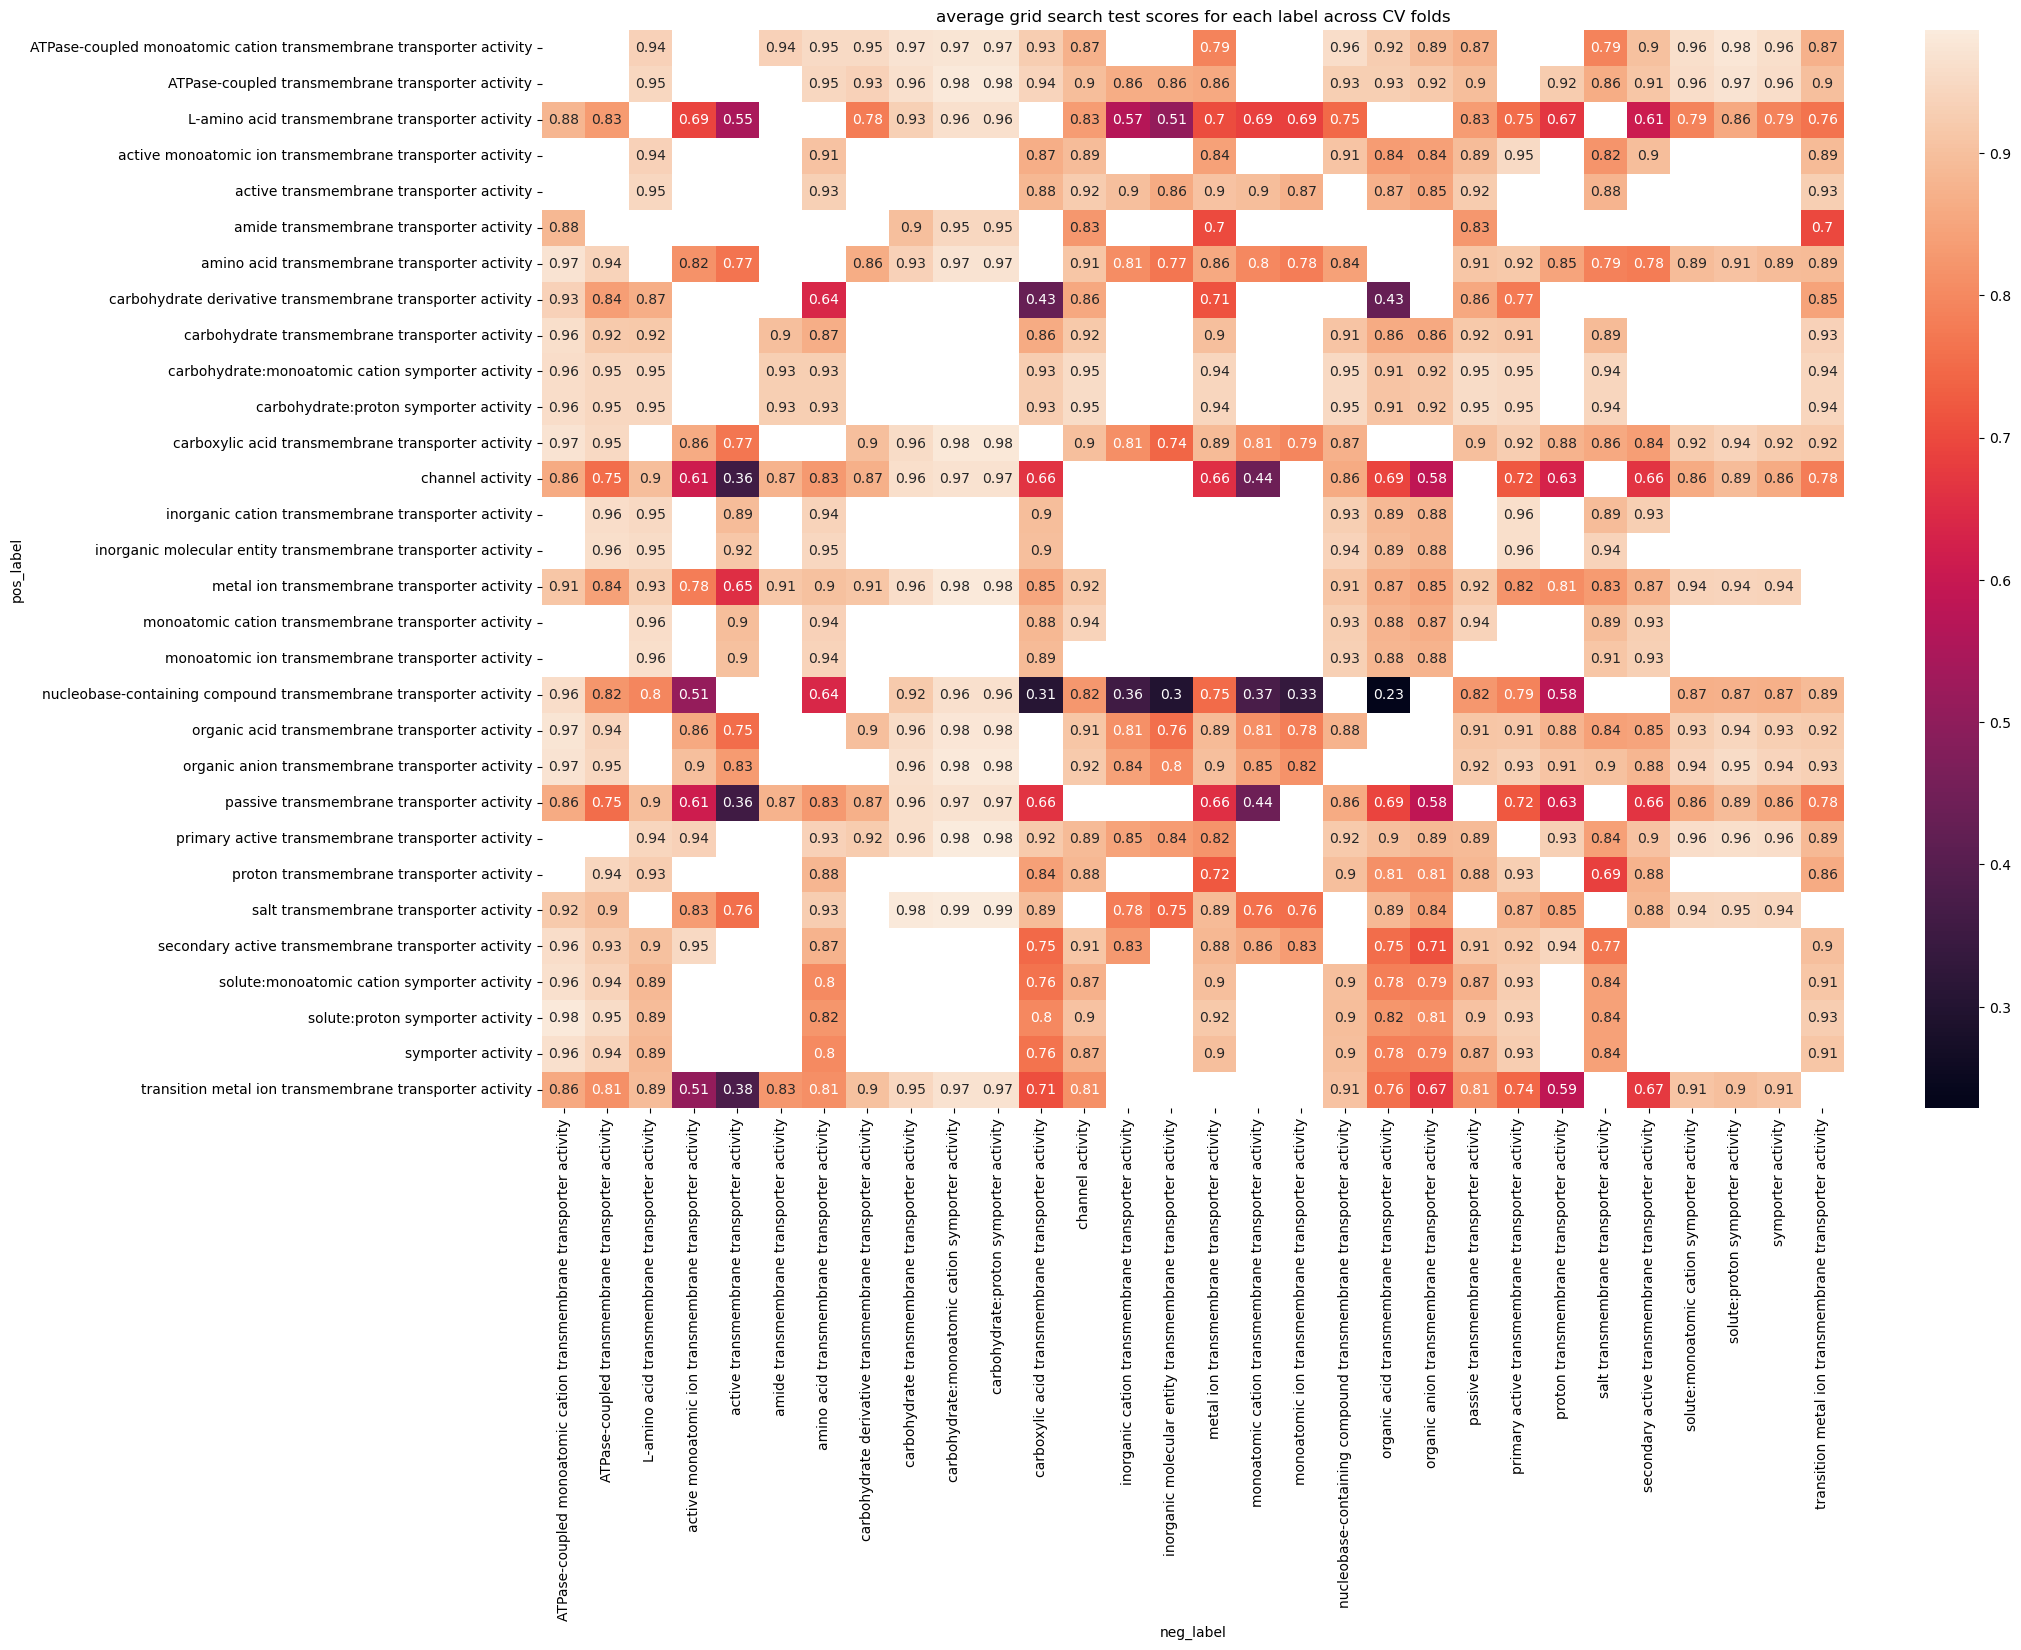

In [34]:
plot_results_as_heatmap(df_train, title="average grid search test scores for each label across CV folds")

<Axes: title={'center': 'average independent test set scores for each label across CV folds'}, xlabel='neg_label', ylabel='pos_label'>

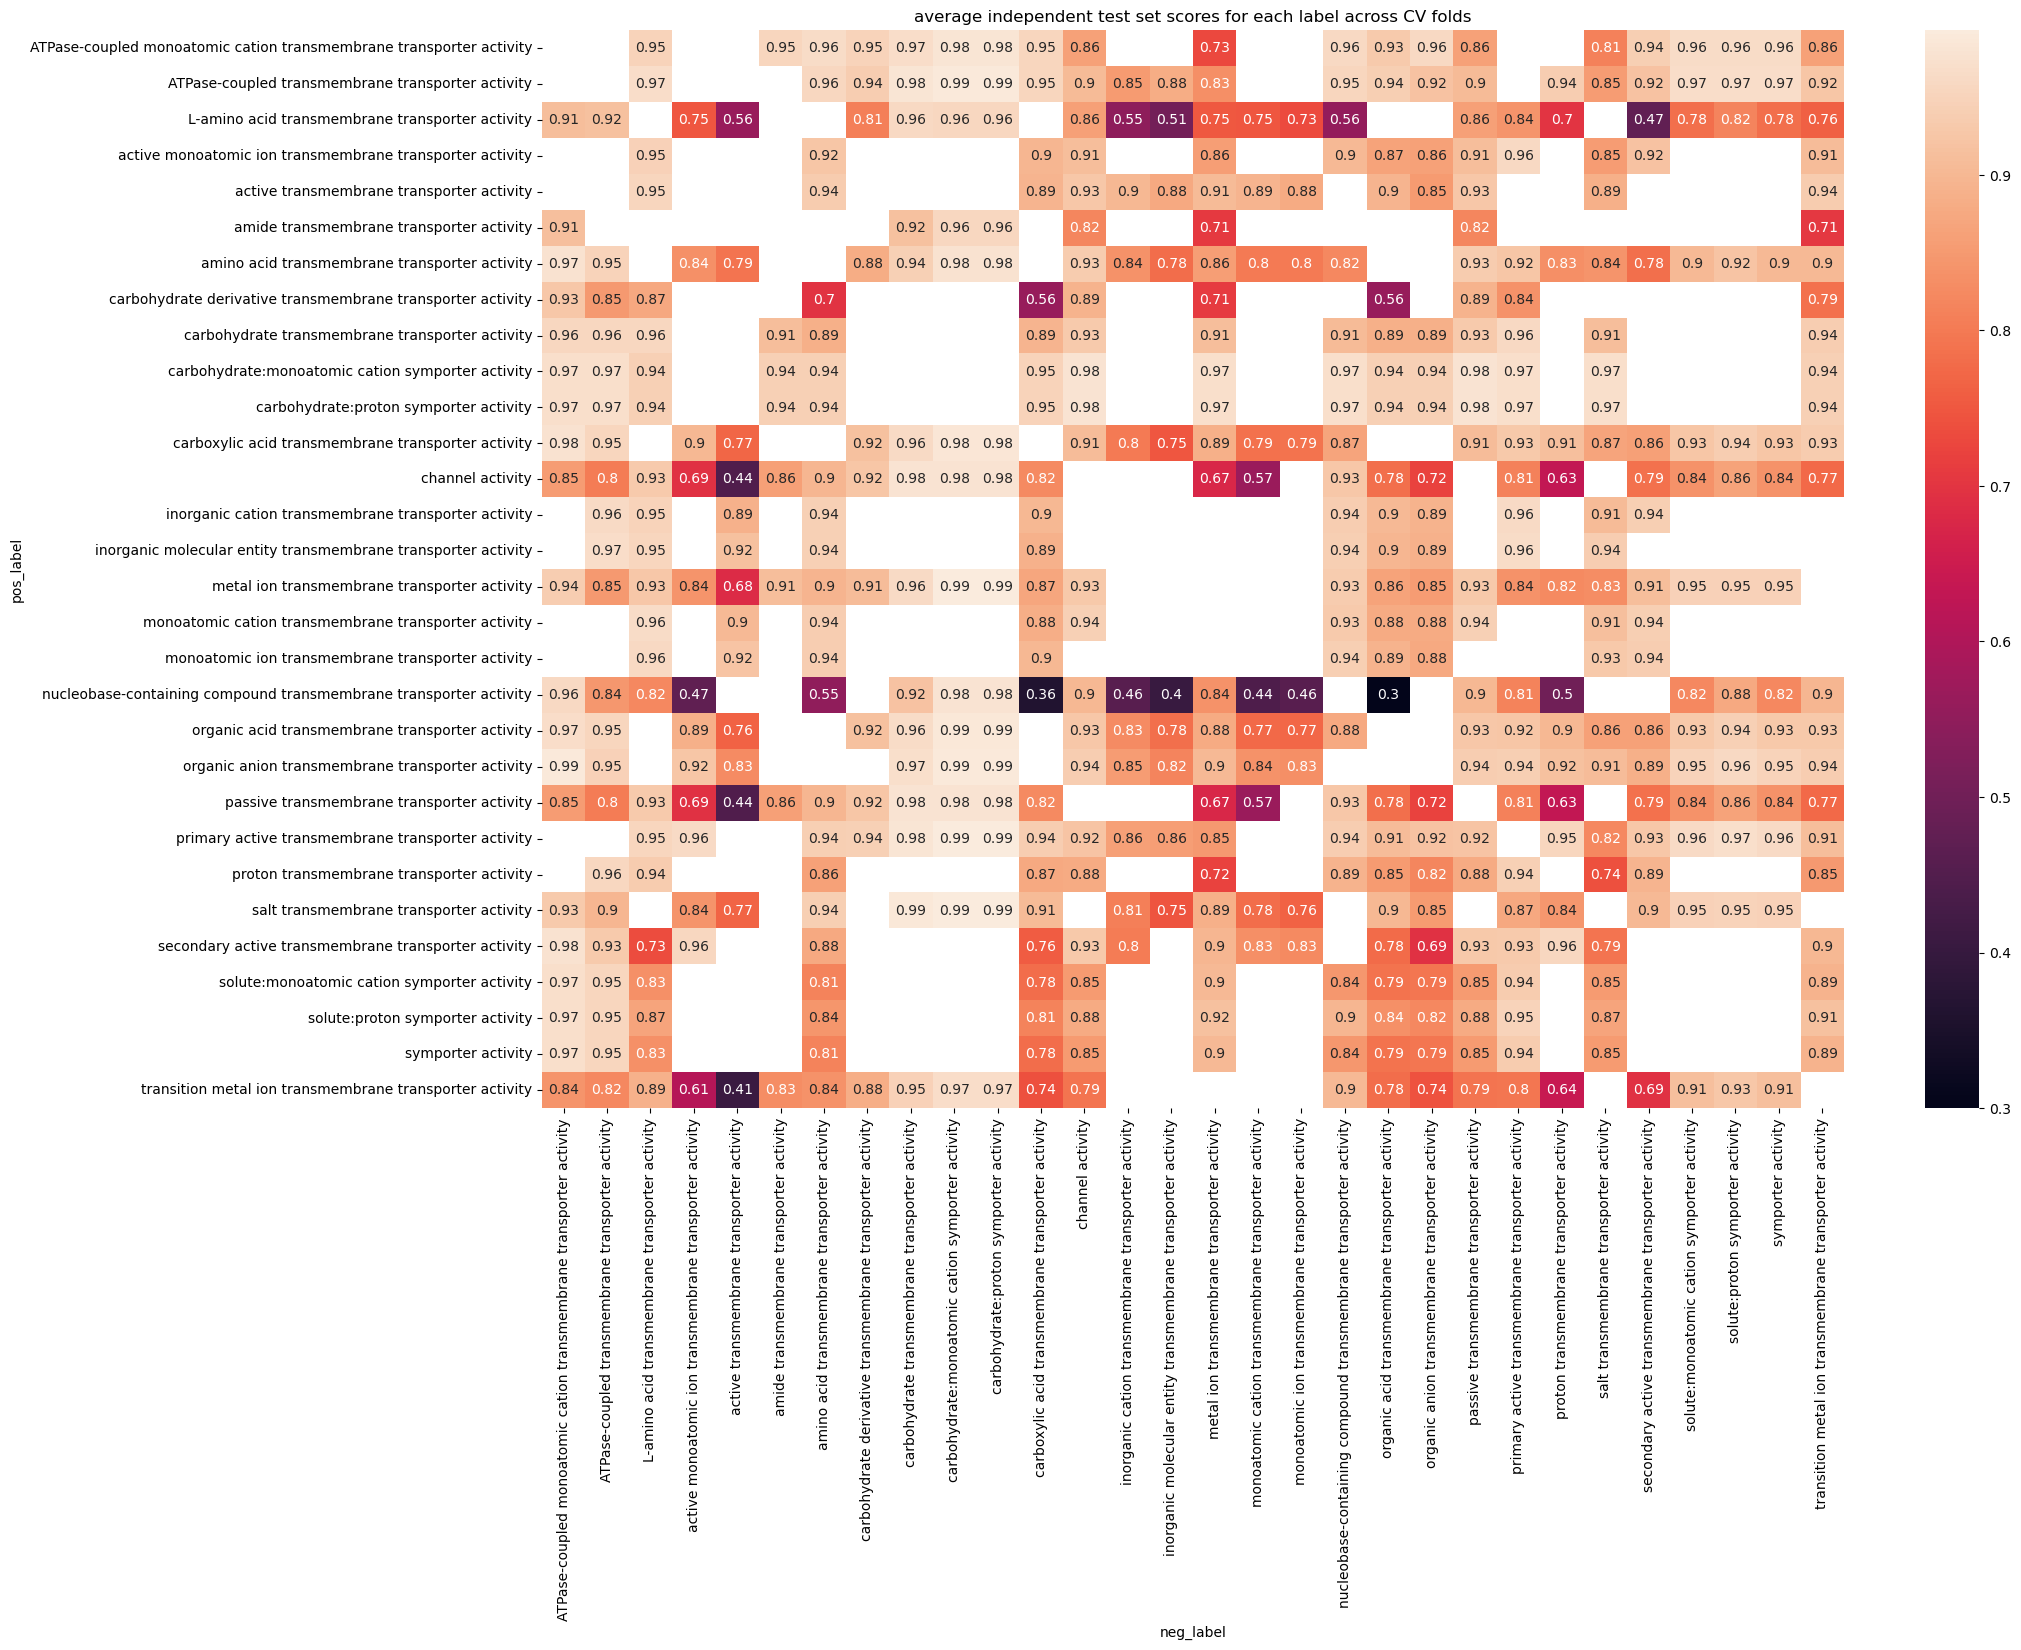

In [30]:
plot_results_as_heatmap(df_test, title="average independent test set scores for each label across CV folds")

### GO

TN FP

FN TP


### ChEBI